In [1]:
# IPython extension to reload modules before executing user code.
# useful to see immediate results in notebook when modifying imported scripts
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
import sys
import os

# Add the ../py directory to sys.path
# This allows importing modules from the py directory as if they were in the current directory
module_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'py'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Verify it works
print(f"Added to path: {module_path}")

Added to path: /Users/eyal/projects/elzurdo/precision-goal/py


In [28]:
# from scipy.stats import beta

from utils_stats import (
    #hdi_ci_limits,
    successes_failures_to_hdi_ci_limits,
    report_success_rates_multiple_algos,
    run_simulations_and_analysis_report, # was called full_analysis
)

from utils_viz import (
    #plot_success_rates
    plot_vhlines_lines,
    plot_parity_line,
    plot_multiple_decision_rates_jammed,
    plot_multiple_decision_rates_separate,
    scatter_stop_iter_sample_rate,
    viz_one_sample_results,
    plot_sample_pdf_methods,
)

from utils_experiments import (
    BinaryAccounting,
    BinomialSimulation,
    BinomialHypothesis,
    stop_decision_multiple_experiments_multiple_methods,
    stats_dict_to_df,
    iteration_counts_to_df,
    sample_all_iterations_results,
)
    

SEED = 42  # previously called seed

In [7]:
import matplotlib.pyplot as plt
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

FIG_WIDTH, FIG_HEIGHT = 8, 6

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = FIG_WIDTH, FIG_HEIGHT
# plt.rcParams["hatch.linewidth"] = 0.2

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Aux

In [67]:
from collections import Counter

def report_accounting_size(binary_accounting):
    
    n_dict = len(binary_accounting.dict_successes_failures_counter)
    print("Binary Accounting Report")
    print(f"{n_dict:,} elements")
    
    #counts = Counter(binary_accounting.dict_successes_failures_counter.values())
    sums = Counter(k[0] + k[1] for k in binary_accounting.dict_successes_failures_counter.keys())
    most_frequent_value, frequency = sums.most_common(1)[0]
    frac_ = frequency / n_dict
    print(f"Most frequent count value: {most_frequent_value:,} (appears {frequency:,} times (of {n_dict:,} {frac_:.2%}))")

    key_max_sum = max(binary_accounting.dict_successes_failures_counter.keys(), key=lambda t: t[0] + t[1])
    print(f"Max sum {np.sum(key_max_sum):,}")
    print(f"e.g, key {key_max_sum} appears {binary_accounting.dict_successes_failures_counter[key_max_sum]:,} time(s) yiedling {binary_accounting.dict_successes_failures_hdi_limits[key_max_sum]} HDI limits")
    print()

    #print(, len(binary_accounting.dict_successes_failures_hdi_limits))
    #print(sys.getsizeof(binary_accounting.dict_successes_failures_counter), sys.getsizeof(binary_accounting.dict_successes_failures_hdi_limits))
report_accounting_size(binary_accounting)

Binary Accounting Report
21,328 elements
Most frequent count value: 537 (appears 34 times (of 21,328 0.16%))
Max sum 1,500
e.g, key (799, 701) appears 1 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits



In [37]:
# used for storing an linking to binary calucations already performed
binary_accounting = BinaryAccounting()

print(binary_accounting.dict_successes_failures_counter, binary_accounting.dict_successes_failures_hdi_limits)
report_accounting_size(binary_accounting)

{} {}
0 0
64 64


# Two Example Experiments

## Hypothesis Generation

In [ ]:
null_rate_fair = 0.5
dsuccess_rate = 0.05
rope_precision_fraction = 0.8

In [ ]:
hypothesis_0pt5 = BinomialHypothesis(
    success_rate_null=null_rate_fair, 
    dsuccess_rate=dsuccess_rate, 
    rope_precision_fraction=rope_precision_fraction)

0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


In [105]:
# Used to collect information of the experiments for this hypothesis, to be used in later analysis and visualization

# experiment_results_hypo0pt5 = {}
# print(len(experiment_results_hypo0pt5))
# print(sys.getsizeof(experiment_results_hypo0pt5))

## Experiments

In [106]:
N_EXPERIMENTS = 2000
N_SAMPLES = 1500  # in paper called M

## Fair Coin ($\theta_{\rm true} = 0.5$)

In [107]:
fair_coin_rate = 0.5

In [108]:
%%time

synth_0pt5 = BinomialSimulation(
    success_rate=fair_coin_rate,
    n_samples = N_SAMPLES,
    n_experiments = N_EXPERIMENTS,
    seed=SEED)  # was called synth_0pt5

Generating synthetic data with parameter values:
0.5: true success rate
2000: experiments
1500: sample size per experiment
CPU times: user 65 ms, sys: 5.76 ms, total: 70.7 ms
Wall time: 70.1 ms


In [109]:
%%time
hypothesis_0pt5.run_hypothesis_on_experiments(synth_0pt5.experiments, binary_accounting)

report_accounting_size(binary_accounting)

Sample 11 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 799, 'failures': 701, 'hdi_min': 0.5074142760260834, 'hdi_max': 0.5578881163957048, 'precision_goal_achieved': True}
Sample 61 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 804, 'failures': 696, 'hdi_min': 0.5107636035522547, 'hdi_max': 0.5612141943766372, 'precision_goal_achieved': True}
Sample 64 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 790, 'failures': 710, 'hdi_min': 0.5014038032397002, 'hdi_max': 0.551913781126643, 'precision_goal_achieved': True}
Sample 65 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.9210,0.061,0.9820,0.0180,592.9835,290.737790,0.498253,0.051782
pitg,0.3670,0.000,0.3670,0.6330,598.2090,1.457526,0.499978,0.020554
epitg,0.9765,0.000,0.9765,0.0235,740.9665,221.187573,0.500032,0.013120


Binary Accounting Report
129,750 elements
Most frequent count value: 501 (appears 134 times (of 129,750 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 3 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

CPU times: user 2min 14s, sys: 567 ms, total: 2min 14s
Wall time: 2min 15s


viz_epitg separate


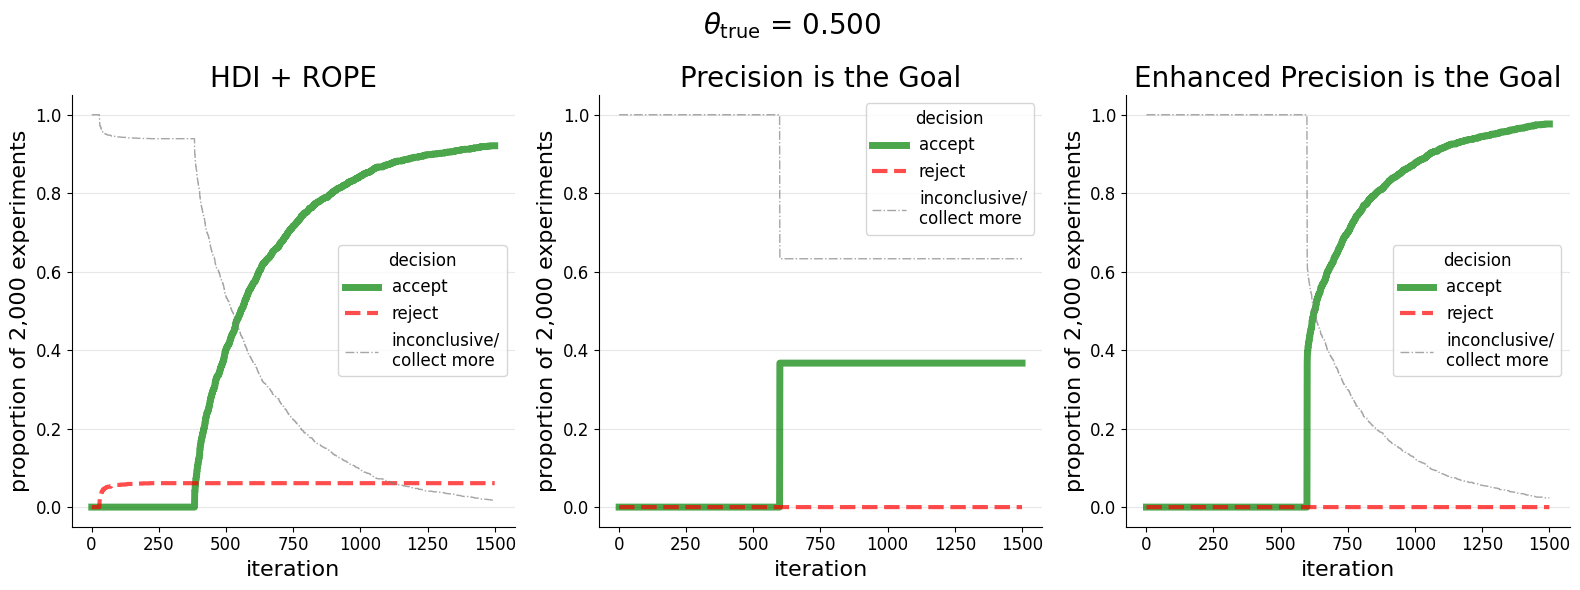

In [110]:
hypothesis_0pt5.plot_decision_rates(synth_0pt5.success_rate, viz_epitg="separate")

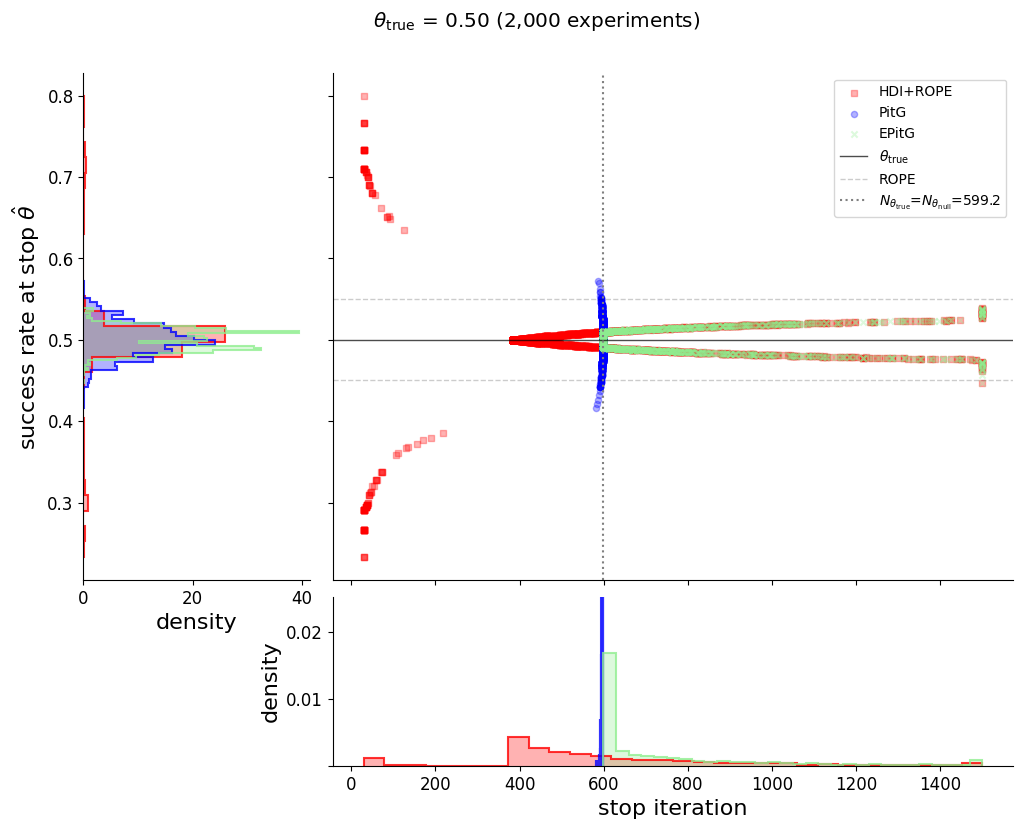

In [111]:
hypothesis_0pt5.plot_stop_iter_sample_rates(success_rate=synth_0pt5.success_rate, title=None)

In [112]:
# Summary Stats
df_stats_0pt5 = report_success_rates_multiple_algos(hypothesis_0pt5.method_df_stats.copy())

count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.499978     0.020554   
          conclusive      734        0.3670      0.500293     0.005508   
          inconclusive   1266        0.6330      0.499794     0.025494   
          accept          734        0.3670      0.500293     0.005508   
epitg     overall        2000        1.0000      0.500032     0.013120   
          conclusive     1953        0.9765      0.499973     0.012220   
          inconclusive     47        0.0235      0.502454     0.033731   
          accept         1953        0.9765      0.499973     0.012220   
hdi_rope  overall        2000        1.0000      0.498253     0.051782   
          conclusive     1964        0.9820      0.498114     0.052057   
          inconclusive     36        0.0180      0.505870     0.033090   
          accept         1842        0.9210      0.499911     0.010597   
          reject          122        0.0610      0.470976     0.203625   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.485810        0.500835     0.514190   
          conclusive       0.495826        0.500835     0.504174   
          inconclusive     0.479933        0.489149     0.520067   
          accept           0.495826        0.500835     0.504174   
epitg     overall          0.489465        0.500835     0.510501   
          conclusive       0.489499        0.500835     0.510433   
          inconclusive     0.470000        0.526667     0.533667   
          accept           0.489499        0.500835     0.510433   
hdi_rope  overall          0.491803        0.500000     0.508057   
          conclusive       0.491892        0.500000     0.507519   
          inconclusive     0.471333        0.528000     0.533500   
          accept           0.492620        0.500000     0.507435   
          reject           0.294118        0.337838     0.702027   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           598.209000       1.457526          598.0   
          conclusive        599.000000       0.000000          599.0   
          inconclusive      597.750395       1.668382          597.0   
          accept            599.000000       0.000000          599.0   
epitg     overall           740.966500     221.187573          599.0   
          conclusive        722.699949     189.462560          599.0   
          inconclusive     1500.000000       0.000000         1500.0   
          accept            722.699949     189.462560          599.0   
hdi_rope  overall           592.983500     290.737790          415.0   
          conclusive        576.357943     265.922483          413.0   
          inconclusive     1500.000000       0.000000         1500.0   
          accept            611.389794     235.712841          426.5   
          reject             47.434426      33.382083           31.0   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  599.0         599.00           0.3670  
          conclusive               599.0         599.00           1.0000  
          inconclusive             598.0         599.00           0.0000  
          accept                   599.0         599.00           1.0000  
epitg     overall                  627.0         794.00           0.9765  
          conclusive               623.0         775.00           1.0000  
          inconclusive            1500.0        1500.00           0.0000  
          accept                   623.0         775.00           1.0000  
hdi_rope  overall                  523.0         721.00      

In [113]:
# experiment ids for which:
# - HDI_ROPE method had success rate > 0.55
# - PITG method was inconclusive
# - EPITG method was conclusive

experiment_idxs = list(sorted(set(hypothesis_0pt5.method_df_stats["pitg"].query("inconclusive").index) &\
set(hypothesis_0pt5.method_df_stats["epitg"].query("accept").index) &\
set(hypothesis_0pt5.method_df_stats["hdi_rope"].query("success_rate > 0.55").index)))
len(experiment_idxs)

35

1011010001100100001011111111100101011011100011111100101001101111111101110011110011100111100010100010111101011111100011111111111000001010010011000000011010001000100000000100101110011101001110000100101100110100001010111100111111110111001010110111001001010100111101010011110111001011100100110010100100010010110101010101001111001100110110111011100101000101100110011001011110011111011101010100011011101111000101101010101010101111000010001110110010101011001001100100011011011111001110000100110010000010101100101011010000011001010001101011100101011010001001101001001001101101001010111000011010001111110010011111001000111000110001010010101011100100001101111011110111001110110100100010010011110111001000001000111000000100101111110111101010001101100100011001010111100000010011011111000000010100110010011100010101000001011111001011100110110101110010000111100100111111100111111111001110110100001011101100011001110010000100111011001110001100101000000011011100001100111001110111001010011010100110010101000110000000

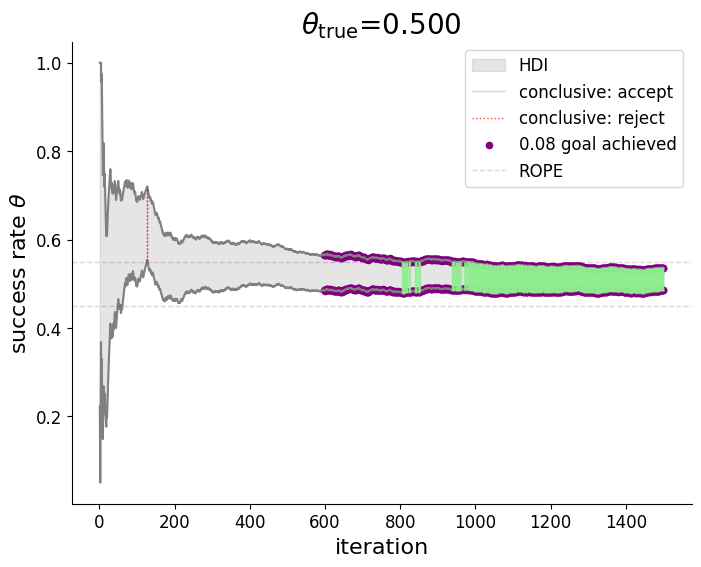

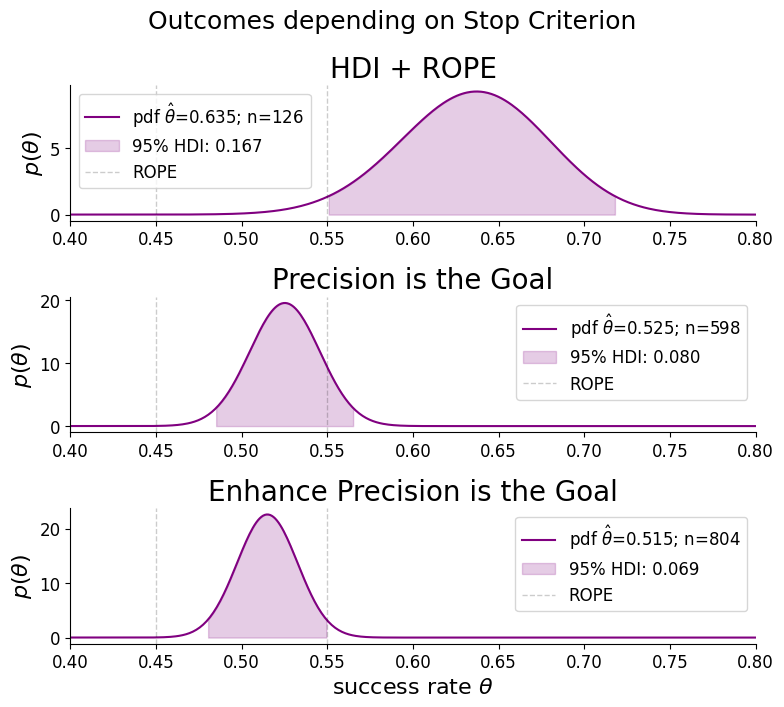

In [121]:
# Visualising outcomes of one experiment

#iexperiment = experiment_idxs[0]
#iexperiment = experiment_idxs[1]  # good example
iexperiment = experiment_idxs[2]  # good example. USE THIS ONE!

# for viz
method_names = ["hdi_rope", "pitg", "epitg"]

print("".join([f"{b_}" for b_ in hypothesis_0pt5.experiments[iexperiment,:] ]))

xlim = (0.4, 0.8)
df_experiment_results = hypothesis_0pt5.one_experiment_all_iterations(iexperiment, binary_accounting=binary_accounting, viz=True, success_rate=synth_0pt5.success_rate, method_names=method_names, xlim=xlim)

#plt.savefig('../latex/foo.png')

## Loaded Coin $\theta_{\rm true}=0.6$

In [115]:
sims_hypo0pt5_results = {
    0.50: {
        "synth": synth_0pt5,
        "hypothesis": hypothesis_0pt5,
        "df_stats": df_stats_0pt5.copy()
    }
}

Generating synthetic data with parameter values:
0.6: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 475 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 861, 'failures': 639, 'hdi_min': 0.5489626323111325, 'hdi_max': 0.5989867505889424, 'precision_goal_achieved': True}
Sample 565 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 859, 'failures': 641, 'hdi_min': 0.5476209931234249, 'hdi_max': 0.597665145471056, 'precision_goal_achieved': True}
Sample 573 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 856, 'failures': 

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0,0.9920,0.9920,0.0080,278.5250,296.550922,0.642112,0.056068
pitg,0.0,0.6930,0.6930,0.3070,574.0995,10.032693,0.600358,0.020512
epitg,0.0,0.9905,0.9905,0.0095,638.4050,164.652043,0.602890,0.017084


viz_epitg separate


count  success_frac  success_mean  success_std  \
algorithm group                                                          
pitg      overall        2000        1.0000      0.600358     0.020512   
          conclusive     1386        0.6930      0.610716     0.014524   
          inconclusive    614        0.3070      0.576978     0.010264   
          reject         1386        0.6930      0.610716     0.014524   
epitg     overall        2000        1.0000      0.602890     0.017084   
          conclusive     1981        0.9905      0.603219     0.016824   
          inconclusive     19        0.0095      0.568596     0.005052   
          reject         1981        0.9905      0.603219     0.016824   
hdi_rope  overall        2000        1.0000      0.642112     0.056068   
          conclusive     1984        0.9920      0.642695     0.055915   
          inconclusive     16        0.0080      0.569833     0.002727   
          reject         1984        0.9920      0.642695     0.055915   

                        success_p25  success_median  success_p75  \
algorithm group                                                    
pitg      overall          0.586919        0.600000     0.614437   
          conclusive       0.598958        0.607706     0.619469   
          inconclusive     0.570698        0.578767     0.584192   
          reject           0.598958        0.607706     0.619469   
epitg     overall          0.589491        0.600000     0.614437   
          conclusive       0.589615        0.600000     0.614437   
          inconclusive     0.567333        0.570000     0.571000   
          reject           0.589615        0.600000     0.614437   
hdi_rope  overall          0.598485        0.624242     0.680000   
          conclusive       0.598972        0.624277     0.680000   
          inconclusive     0.568500        0.570333     0.571333   
          reject           0.598972        0.624277     0.680000   

                        stop_iter_mean  stop_iter_std  stop_iter_p25  \
algorithm group                                                        
pitg      overall           574.099500      10.032693          568.0   
          conclusive        569.360029       8.148768          565.0   
          inconclusive      584.798046       3.574186          582.0   
          reject            569.360029       8.148768          565.0   
epitg     overall           638.405000     164.652043          568.0   
          conclusive        630.141343     142.051400          568.0   
          inconclusive     1500.000000       0.000000         1500.0   
          reject            630.141343     142.051400          568.0   
hdi_rope  overall           278.525000     296.550922           50.0   
          conclusive        268.674395     276.616344           50.0   
          inconclusive     1500.000000       0.000000         1500.0   
          reject            268.674395     276.616344           50.0   

                        stop_iter_median  stop_iter_p75  conclusive_mean  
algorithm group                                                           
pitg      overall                  575.0          581.0           0.6930  
          conclusive               571.0          576.0           1.0000  
          inconclusive             584.0          587.0           0.0000  
          reject                   571.0          576.0           1.0000  
epitg     overall                  575.0          607.0           0.9905  
          conclusive               575.0          602.0           1.0000  
          inconclusive            1500.0         1500.0           0.0000  
          reject                   575.0          602.0           1.0000  
hdi_rope  overall                  168.0          401.5           0.9920  
          conclusive               165.0          394.5           1.0000  
          inconclusive            1500.0         1500.0           0.0000  
          reject                   165.0          

CPU times: user 13.6 s, sys: 283 ms, total: 13.9 s
Wall time: 13.5 s


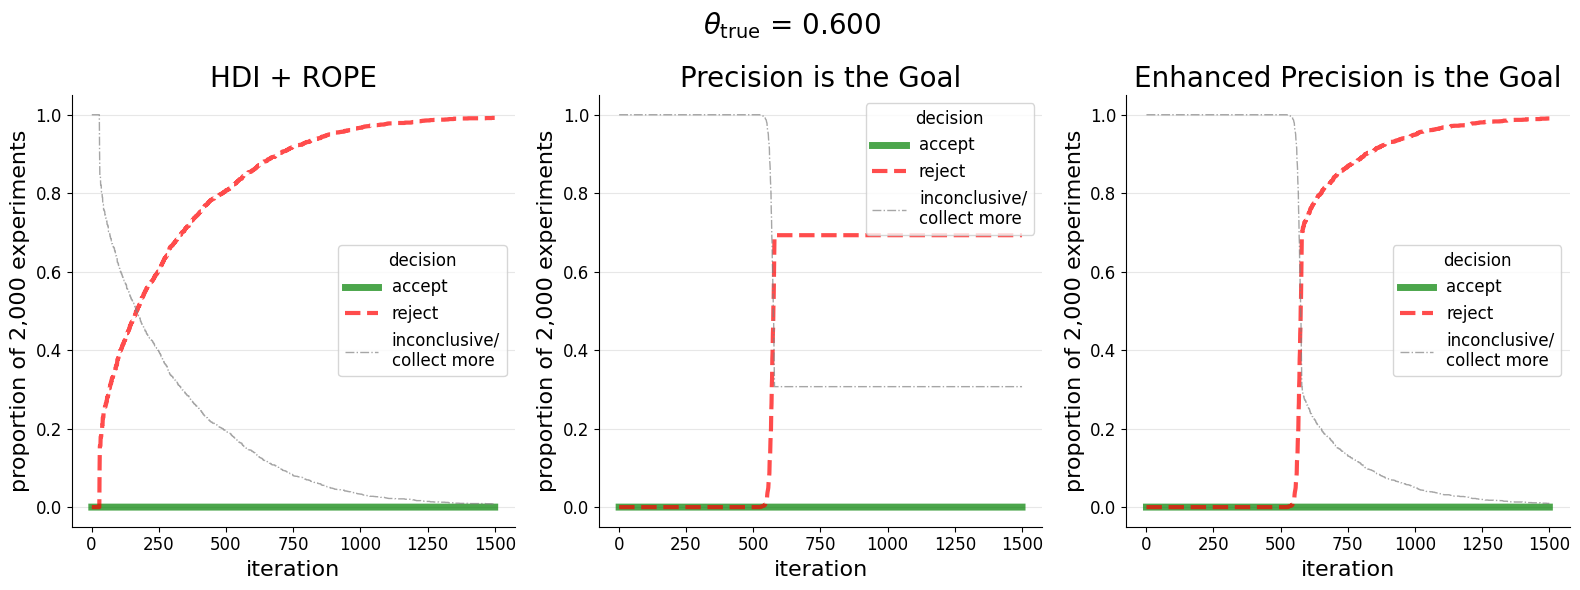

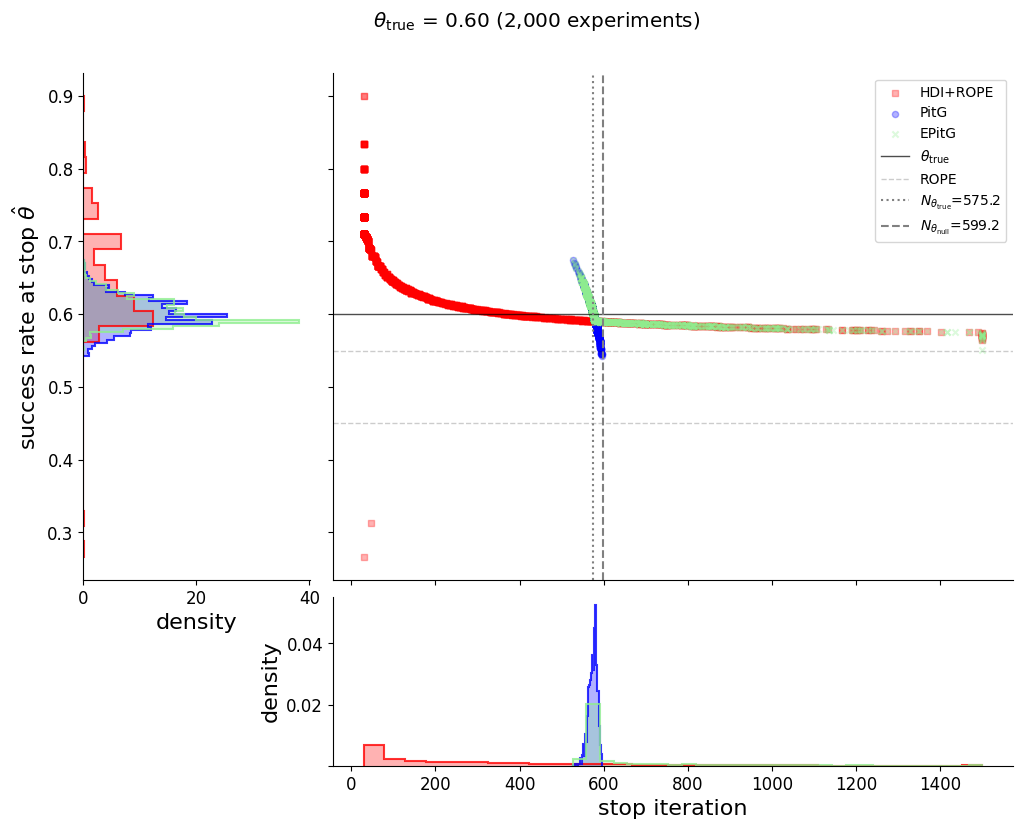

In [116]:
%%time

loaded_0pt6_rate = 0.60

sims_hypo0pt5_results[0.60] = run_simulations_and_analysis_report(
    binary_accounting,
    success_rate_true=loaded_0pt6_rate,
    success_rate_null=null_rate_fair,
    dsuccess_rate=dsuccess_rate,
    n_experiments=N_EXPERIMENTS,
    n_samples=N_SAMPLES,
    rope_precision_fraction=rope_precision_fraction,
    seed=SEED,
    viz=True
)

In [117]:
report_accounting_size(binary_accounting)

Binary Accounting Report
131,490 elements
Most frequent count value: 499 (appears 134 times (of 131,490 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 3 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits



# Running Multiple Coins

In [118]:
%%time

loaded_coin_rates = [0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62, 0.63, 0.64, 0.65]

for this_rate in loaded_coin_rates:
    sims_hypo0pt5_results[this_rate] = run_simulations_and_analysis_report(
        binary_accounting,
        success_rate_true=this_rate,
        success_rate_null=null_rate_fair,
        dsuccess_rate=dsuccess_rate,
        n_experiments=N_EXPERIMENTS,
        n_samples=N_SAMPLES,
        rope_precision_fraction=rope_precision_fraction,
        seed=SEED,
        viz=False
    )

    report_accounting_size(binary_accounting)
    print("-" * 40)

Generating synthetic data with parameter values:
0.51: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 4 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 803, 'failures': 697, 'hdi_min': 0.5100953662778638, 'hdi_max': 0.5605507887921236, 'precision_goal_achieved': True}
Sample 5 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 798, 'failures': 702, 'hdi_min': 0.5067462649612215, 'hdi_max': 0.5572244824897478, 'precision_goal_achieved': True}
Sample 27 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 800, 'failures': 700

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.877,0.0715,0.9485,0.0515,640.6875,349.645620,0.511196,0.053880
pitg,0.335,0.0005,0.3355,0.6645,597.9670,1.774115,0.510097,0.020574
epitg,0.932,0.0005,0.9325,0.0675,798.5955,277.257149,0.507063,0.013793


Binary Accounting Report
132,780 elements
Most frequent count value: 501 (appears 135 times (of 132,780 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 9 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.52: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 3 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 796, 'failures': 704, 'hdi_min': 0.5054189719605636, 'hdi_max': 0.5559056796504055, 'precision_goal_achieved': True}
Sample 4 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 818, 'failures': 682, 'hdi_min': 0.520132265622

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.7420,0.0780,0.820,0.180,781.3675,454.818403,0.521762,0.054782
pitg,0.2345,0.0015,0.236,0.764,597.2440,2.499317,0.520183,0.020711
epitg,0.7780,0.0020,0.780,0.220,946.1260,364.507324,0.515122,0.015324


Binary Accounting Report
133,014 elements
Most frequent count value: 501 (appears 135 times (of 133,014 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 31 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.53: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 2 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 795, 'failures': 705, 'hdi_min': 0.5047510964288994, 'hdi_max': 0.5552419113387459, 'precision_goal_achieved': True}
Sample 3 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 805, 'failures': 695, 'hdi_min': 0.51143188610

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.5110,0.1140,0.625,0.375,942.3635,532.153087,0.536867,0.059220
pitg,0.1445,0.0025,0.147,0.853,596.0795,3.341371,0.530125,0.020632
epitg,0.5310,0.0060,0.537,0.463,1148.5125,385.163010,0.525122,0.017286


Binary Accounting Report
133,149 elements
Most frequent count value: 501 (appears 135 times (of 133,149 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 62 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.54: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 799, 'failures': 701, 'hdi_min': 0.5074142760260834, 'hdi_max': 0.5578881163957048, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 810, 'failures': 690, 'hdi_min': 0.51477397841

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.2670,0.1625,0.4295,0.5705,1070.8565,559.737505,0.553041,0.060163
pitg,0.0675,0.0085,0.0760,0.9240,594.4305,4.218420,0.540124,0.020426
epitg,0.2600,0.0305,0.2905,0.7095,1308.2205,334.458018,0.537258,0.018572


Binary Accounting Report
133,239 elements
Most frequent count value: 501 (appears 135 times (of 133,239 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 89 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.55: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 815, 'failures': 685, 'hdi_min': 0.5181172046705578, 'hdi_max': 0.5685086565684114, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 828, 'failures': 672, 'hdi_min': 0.52682349053

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.110,0.2540,0.3640,0.6360,1090.1835,588.159585,0.570888,0.060070
pitg,0.022,0.0270,0.0490,0.9510,592.2885,5.208439,0.550080,0.020389
epitg,0.094,0.0925,0.1865,0.8135,1373.9355,286.618554,0.550075,0.018580


Binary Accounting Report
133,403 elements
Most frequent count value: 501 (appears 135 times (of 133,403 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 94 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.56: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 829, 'failures': 671, 'hdi_min': 0.5274928637761854, 'hdi_max': 0.5777930962811357, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 839, 'failures': 661, 'hdi_min': 0.53419767097

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0330,0.4150,0.448,0.552,998.4935,618.529451,0.588080,0.059521
pitg,0.0035,0.0725,0.076,0.924,589.5750,6.138340,0.560317,0.020270
epitg,0.0215,0.2685,0.290,0.710,1303.4305,341.767516,0.563398,0.018307


Binary Accounting Report
133,604 elements
Most frequent count value: 501 (appears 135 times (of 133,604 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.57: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 0 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 840, 'failures': 660, 'hdi_min': 0.534867547044455, 'hdi_max': 0.5850835156227976, 'precision_goal_achieved': True}
Sample 1 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 853, 'failures': 647, 'hdi_min': 0.543597186417

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0080,0.6480,0.6560,0.3440,804.6165,611.021115,0.604697,0.058295
pitg,0.0005,0.1570,0.1575,0.8425,586.4470,7.116144,0.570288,0.020308
epitg,0.0035,0.5415,0.5450,0.4550,1127.1755,395.941462,0.575583,0.017217


Binary Accounting Report
133,694 elements
Most frequent count value: 501 (appears 135 times (of 133,694 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.58: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 7 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 854, 'failures': 646, 'hdi_min': 0.5442591781856505, 'hdi_max': 0.594351784888959, 'precision_goal_achieved': True}
Sample 11 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 848, 'failures': 652, 'hdi_min': 0.54022820920

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0005,0.8530,0.8535,0.1465,585.331,540.685760,0.620141,0.057135
pitg,0.0000,0.3175,0.3175,0.6825,582.768,8.108641,0.580360,0.020475
epitg,0.0000,0.8045,0.8045,0.1955,914.951,372.452422,0.586007,0.015814


Binary Accounting Report
133,762 elements
Most frequent count value: 501 (appears 135 times (of 133,762 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.59: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 11 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 859, 'failures': 641, 'hdi_min': 0.5476209931234249, 'hdi_max': 0.597665145471056, 'precision_goal_achieved': True}
Sample 12 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 846, 'failures': 654, 'hdi_min': 0.5388963120

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0,0.9695,0.9695,0.0305,394.8700,406.259818,0.632173,0.056758
pitg,0.0,0.5045,0.5045,0.4955,578.6600,9.058942,0.590418,0.020469
epitg,0.0,0.9570,0.9570,0.0430,735.8265,266.307359,0.594787,0.015723


Binary Accounting Report
133,810 elements
Most frequent count value: 501 (appears 135 times (of 133,810 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.6: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 475 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 861, 'failures': 639, 'hdi_min': 0.5489626323111325, 'hdi_max': 0.5989867505889424, 'precision_goal_achieved': True}
Sample 565 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 859, 'failures': 641, 'hdi_min': 0.54762099

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0,0.9920,0.9920,0.0080,278.5250,296.550922,0.642112,0.056068
pitg,0.0,0.6930,0.6930,0.3070,574.0995,10.032693,0.600358,0.020512
epitg,0.0,0.9905,0.9905,0.0095,638.4050,164.652043,0.602890,0.017084


Binary Accounting Report
133,810 elements
Most frequent count value: 501 (appears 135 times (of 133,810 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.61: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal
Sample 601 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 861, 'failures': 639, 'hdi_min': 0.5489626323111325, 'hdi_max': 0.5989867505889424, 'precision_goal_achieved': True}
Sample 1873 at final iteration
{'decision_iteration': 1500, 'accept': False, 'reject_below': False, 'reject_above': False, 'conclusive': False, 'inconclusive': True, 'successes': 856, 'failures': 644, 'hdi_min': 0.545600

,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0,0.9995,0.9995,0.0005,204.231,214.909825,0.651210,0.055878
pitg,0.0,0.8410,0.8410,0.1590,569.074,11.120493,0.610348,0.020662
epitg,0.0,0.9985,0.9985,0.0015,592.493,92.655396,0.611506,0.018766


Binary Accounting Report
134,264 elements
Most frequent count value: 490 (appears 135 times (of 134,264 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.62: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0,1.000,1.000,0.000,157.7065,161.762505,0.659565,0.055200
pitg,0.0,0.934,0.934,0.066,563.4645,12.119744,0.620420,0.020708
epitg,0.0,1.000,1.000,0.000,571.4140,51.754361,0.620869,0.019815


Binary Accounting Report
134,881 elements
Most frequent count value: 485 (appears 137 times (of 134,881 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.63: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0,1.000,1.000,0.000,122.6660,122.368867,0.668872,0.055158
pitg,0.0,0.974,0.974,0.026,557.3740,13.044585,0.630577,0.020629
epitg,0.0,1.000,1.000,0.000,559.7985,28.474784,0.630724,0.020284


Binary Accounting Report
135,537 elements
Most frequent count value: 487 (appears 140 times (of 135,537 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.64: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0,1.000,1.000,0.000,99.2070,91.864927,0.677392,0.054354
pitg,0.0,0.992,0.992,0.008,550.8565,14.155038,0.640579,0.020743
epitg,0.0,1.000,1.000,0.000,551.3665,17.474663,0.640609,0.020664


Binary Accounting Report
136,235 elements
Most frequent count value: 487 (appears 142 times (of 136,235 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
Generating synthetic data with parameter values:
0.65: true success rate
2000: experiments
1500: sample size per experiment
0.5: null hypothesis
0.45: ROPE min
0.55: ROPE max
--------------------
0.08: Precision Goal


,accept,reject,conclusive,inconclusive,stop_iter_mean,stop_iter_std,success_rate_mean,success_rate_std
hdi_rope,0.0,1.0000,1.0000,0.0000,82.5675,72.153569,0.686040,0.055239
pitg,0.0,0.9995,0.9995,0.0005,543.6420,15.324466,0.650811,0.020900
epitg,0.0,1.0000,1.0000,0.0000,543.6445,15.330970,0.650812,0.020898


Binary Accounting Report
136,896 elements
Most frequent count value: 477 (appears 143 times (of 136,896 0.10%))
Max sum 1,500
e.g, key (799, 701) appears 95 time(s) yiedling (0.5074142760260834, 0.5578881163957048) HDI limits

----------------------------------------
CPU times: user 1min 51s, sys: 809 ms, total: 1min 52s
Wall time: 1min 53s


In [127]:
algo_stats_df = {}

# subset_name = "overall"
# #subset_name = "conclusive"

l_stats_viz = ["stop_iter_p25", 'stop_iter_median', "stop_iter_p75", "stop_iter_mean",
"success_mean", "success_p25", "success_median", "success_p75",
"conclusive_mean"]


for subset_name in ["overall", "conclusive"]:
    algo_stats_df[subset_name] = {}
    for algo_name in [ 'hdi_rope','pitg', 'epitg']:
        result_summary = {}
        for theta_true, experiment_result in sims_hypo0pt5_results.items():
            result_summary[theta_true] = experiment_result['df_stats'].loc[(algo_name, subset_name), l_stats_viz]

        algo_stats_df[subset_name][algo_name] = pd.DataFrame(result_summary)
        algo_stats_df[subset_name][algo_name].columns.name = 'theta_true'
        algo_stats_df[subset_name][algo_name].index.name = 'stat'
        algo_stats_df[subset_name][algo_name] = algo_stats_df[subset_name][algo_name].T

        algo_stats_df[subset_name][algo_name]  = algo_stats_df[subset_name][algo_name].sort_index()

algo_stats_df[subset_name][algo_name]

stat,stop_iter_p25,stop_iter_median,stop_iter_p75,stop_iter_mean,success_mean,success_p25,success_median,success_p75,conclusive_mean
theta_true,,,,,,,,,
0.50,599.00,623.0,775.0,722.699949,0.499973,0.489499,0.500835,0.510433,1.0
0.51,599.00,640.0,828.0,747.823592,0.505178,0.494157,0.507513,0.514763,1.0
0.52,599.00,667.0,922.5,789.905128,0.509278,0.502504,0.511006,0.517401,1.0
0.53,599.00,722.0,1059.5,845.460894,0.512623,0.507513,0.513324,0.519963,1.0
0.54,599.00,732.0,1034.0,839.829604,0.520513,0.509182,0.514763,0.521523,1.0
0.55,599.00,706.0,1019.0,824.050938,0.550572,0.513250,0.524579,0.587372,1.0
0.56,580.50,712.0,1018.5,822.174138,0.582014,0.578924,0.585628,0.590501,1.0
0.57,579.00,711.0,989.5,815.918349,0.588071,0.580875,0.586351,0.592401,1.0
0.58,577.00,625.0,914.0,772.779366,0.591296,0.582073,0.588976,0.597920,1.0


(0.0, 1.0)

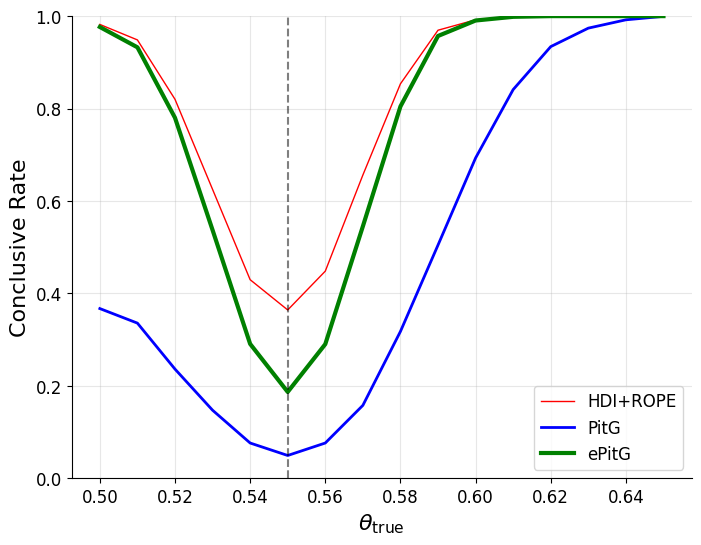

In [193]:
ALGO_NAME = {"hdi_rope":"HDI+ROPE", "pitg": "PitG", "epitg": "ePitG"}
ALGO_LINEWIDTH =  {"hdi_rope":1, "pitg": 2, "epitg":3}

subset_name = "overall"

for algo_name in ALGO_NAME:
    plt.plot(algo_stats_df[subset_name][algo_name]["conclusive_mean"],
    color=ALGO_COLORS[algo_name], label=ALGO_NAME[algo_name], linewidth=ALGO_LINEWIDTH[algo_name])


#plt.plot(algo_stats_df[subset_name]["hdi_rope"]["conclusive_mean"], color=ALGO_COLORS["hdi_rope"], label=ALGO_NAME["hdi_rope"])
#plt.plot(algo_stats_df[subset_name]["pitg"]["conclusive_mean"], color=ALGO_COLORS["pitg"], label=ALGO_NAME["pitg"])
#plt.plot(algo_stats_df[subset_name]["epitg"]["conclusive_mean"], color=ALGO_COLORS["epitg"], label=ALGO_NAME["epitg"])
plt.grid(alpha=0.3)
plt.xlabel(r"$\theta_{\rm true}$")
plt.ylabel("Conclusive Rate")
plt.legend()
plt.axvline(x=0.5 + dsuccess_rate, color="black", linestyle="--", alpha=0.5)

plt.ylim(0.,1)

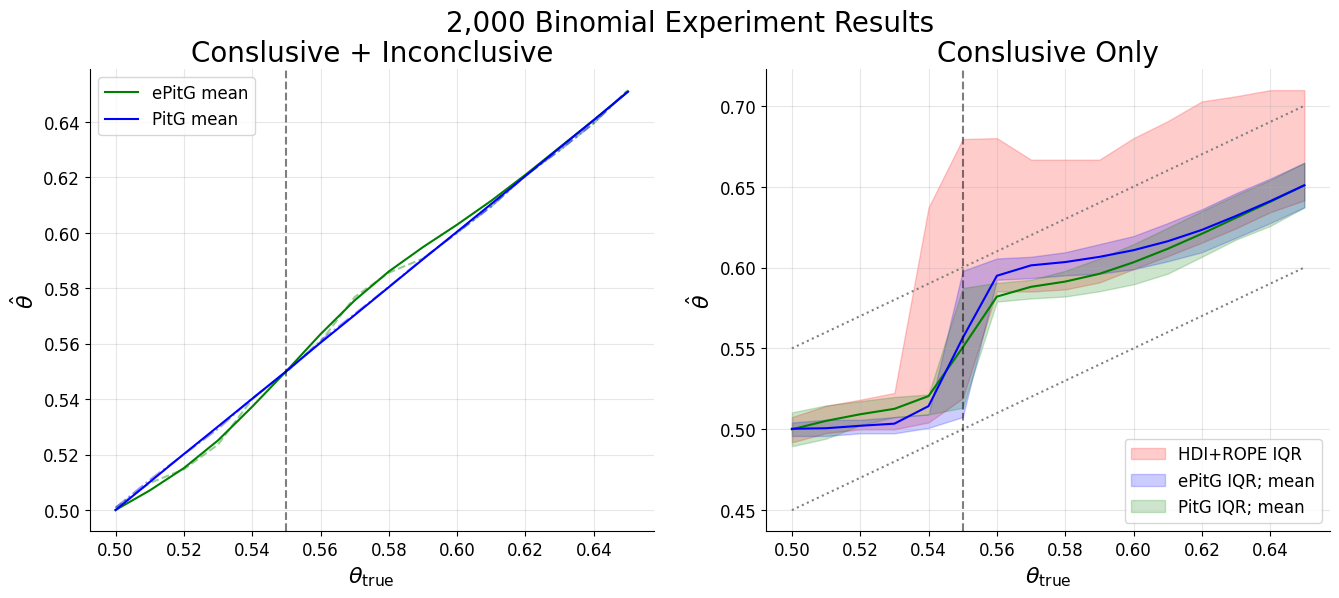

In [220]:


xvalues = np.array(algo_stats_df[subset_name]["epitg"]["success_median"].index.tolist())

rope_mins = xvalues - dsuccess_rate
rope_maxs = xvalues + dsuccess_rate

plt.figure(figsize=(2 * FIG_WIDTH, FIG_HEIGHT))

# === Conclusives ===

plt.suptitle(f"{N_EXPERIMENTS:,} Binomial Experiment Results", fontsize=20)
plt.subplot(1,2,2)

subset_name = "conclusive"
plt.title("Conslusive Only", fontsize=20)
plt.fill_between(xvalues, algo_stats_df[subset_name]["hdi_rope"]["success_p25"], algo_stats_df[subset_name]["hdi_rope"]["success_p75"], color=ALGO_COLORS["hdi_rope"], alpha=0.2, label=f"{ALGO_NAME['hdi_rope']} IQR")

plt.fill_between(xvalues, algo_stats_df[subset_name]["pitg"]["success_p25"], algo_stats_df[subset_name]["pitg"]["success_p75"], color=ALGO_COLORS["pitg"], alpha=0.2, label=f"{ALGO_NAME['epitg']} IQR; mean")
plt.fill_between(xvalues, algo_stats_df[subset_name]["epitg"]["success_p25"], algo_stats_df[subset_name]["epitg"]["success_p75"], color=ALGO_COLORS["epitg"], alpha=0.2, label=f"{ALGO_NAME['pitg']} IQR; mean")
plt.plot(algo_stats_df[subset_name]["epitg"]["success_mean"],color=ALGO_COLORS["epitg"])
plt.plot(algo_stats_df[subset_name]["pitg"]["success_mean"], color=ALGO_COLORS["pitg"])


plt.plot(xvalues, rope_mins, color="gray", linestyle=":")
plt.plot(xvalues, rope_maxs, color="gray", linestyle=":")
plt.axvline(x=0.5 + dsuccess_rate, color="black", linestyle="--", alpha=0.5)

plt.xlabel(r"$\theta_{\rm true}$")
plt.ylabel(r"$\hat{\theta}$")
plt.legend()


plt.grid(alpha=0.3)


# === Overall ===

plt.subplot(1,2,1)

subset_name = "overall"
plt.title("Conslusive + Inconclusive", fontsize=20)
plt.plot(algo_stats_df[subset_name]["epitg"]["success_median"], color=ALGO_COLORS["epitg"], linestyle="--", alpha=0.4)
plt.plot(algo_stats_df[subset_name]["pitg"]["success_median"], color=ALGO_COLORS["pitg"], linestyle="-.", alpha=0.4)

plt.plot(algo_stats_df[subset_name]["epitg"]["success_mean"],color=ALGO_COLORS["epitg"], label=f"{ALGO_NAME['epitg']} mean")
plt.plot(algo_stats_df[subset_name]["pitg"]["success_mean"], color=ALGO_COLORS["pitg"], label=f"{ALGO_NAME['pitg']} mean")

# plt.plot(xvalues, rope_mins, color="gray", linestyle=":")
# plt.plot(xvalues, rope_maxs, color="gray", linestyle=":")
plt.axvline(x=0.5 + dsuccess_rate, color="black", linestyle="--", alpha=0.5)

plt.xlabel(r"$\theta_{\rm true}$")
plt.ylabel(r"$\hat{\theta}$")
plt.legend()


plt.grid(alpha=0.3)

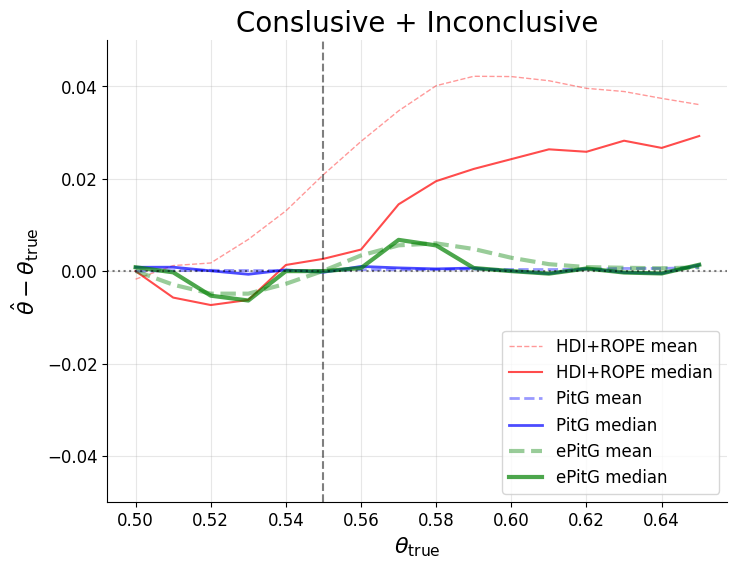

In [237]:
subset_name = "overall"

plt.title("Conslusive + Inconclusive", fontsize=20)
hdirope_median_diff = algo_stats_df[subset_name]["hdi_rope"]["success_median"] - xvalues
hdirope_mean_diff = algo_stats_df[subset_name]["hdi_rope"]["success_mean"] - xvalues
epitg_median_diff = algo_stats_df[subset_name]["epitg"]["success_median"] - xvalues
pit_median_diff = algo_stats_df[subset_name]["pitg"]["success_median"] - xvalues

epitg_mean_diff = algo_stats_df[subset_name]["epitg"]["success_mean"] - xvalues
pit_mean_diff = algo_stats_df[subset_name]["pitg"]["success_mean"] - xvalues

plt.plot(xvalues, hdirope_mean_diff, color=ALGO_COLORS["hdi_rope"], linestyle="--", alpha=0.4, label=f"{ALGO_NAME['hdi_rope']} mean", linewidth=ALGO_LINEWIDTH["hdi_rope"])
plt.plot(xvalues, hdirope_median_diff, color=ALGO_COLORS["hdi_rope"], linestyle=None, alpha=0.7, label=f"{ALGO_NAME['hdi_rope']} median")

plt.plot(xvalues, pit_mean_diff, color=ALGO_COLORS["pitg"], linestyle="--", alpha=0.4, label=f"{ALGO_NAME['pitg']} mean", linewidth=ALGO_LINEWIDTH["pitg"])
plt.plot(xvalues, pit_median_diff, color=ALGO_COLORS["pitg"], linestyle=None, alpha=0.7, label=f"{ALGO_NAME['pitg']} median", linewidth=ALGO_LINEWIDTH["pitg"])

plt.plot(xvalues, epitg_mean_diff, color=ALGO_COLORS["epitg"], linestyle="--", alpha=0.4, label=f"{ALGO_NAME['epitg']} mean", linewidth=ALGO_LINEWIDTH["epitg"])
plt.plot(xvalues, epitg_median_diff, color=ALGO_COLORS["epitg"], linestyle=None, alpha=0.7, label=f"{ALGO_NAME['epitg']} median", linewidth=ALGO_LINEWIDTH["epitg"])

plt.axhline(y=0, color="black", linestyle=":", alpha=0.5)
plt.xlabel(r"$\theta_{\rm true}$")
plt.ylabel(r"$\hat{\theta} - \theta_{\rm true}$")
plt.legend()
plt.axvline(x=0.5 + dsuccess_rate, color="black", linestyle="--", alpha=0.5)

plt.ylim(-dsuccess_rate,dsuccess_rate)

plt.grid(alpha=0.3)

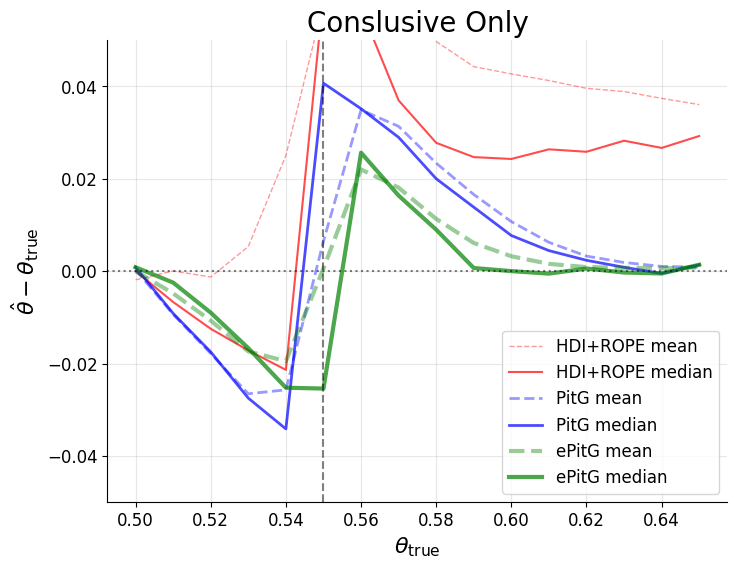

In [238]:
subset_name = "conclusive"
plt.title("Conslusive Only", fontsize=20)

hdirope_median_diff = algo_stats_df[subset_name]["hdi_rope"]["success_median"] - xvalues
hdirope_mean_diff = algo_stats_df[subset_name]["hdi_rope"]["success_mean"] - xvalues
epitg_median_diff = algo_stats_df[subset_name]["epitg"]["success_median"] - xvalues
pit_median_diff = algo_stats_df[subset_name]["pitg"]["success_median"] - xvalues

epitg_mean_diff = algo_stats_df[subset_name]["epitg"]["success_mean"] - xvalues
pit_mean_diff = algo_stats_df[subset_name]["pitg"]["success_mean"] - xvalues

plt.plot(xvalues, hdirope_mean_diff, color=ALGO_COLORS["hdi_rope"], linestyle="--", alpha=0.4, label=f"{ALGO_NAME['hdi_rope']} mean", linewidth=ALGO_LINEWIDTH["hdi_rope"])
plt.plot(xvalues, hdirope_median_diff, color=ALGO_COLORS["hdi_rope"], linestyle=None, alpha=0.7, label=f"{ALGO_NAME['hdi_rope']} median")

plt.plot(xvalues, pit_mean_diff, color=ALGO_COLORS["pitg"], linestyle="--", alpha=0.4, label=f"{ALGO_NAME['pitg']} mean", linewidth=ALGO_LINEWIDTH["pitg"])
plt.plot(xvalues, pit_median_diff, color=ALGO_COLORS["pitg"], linestyle=None, alpha=0.7, label=f"{ALGO_NAME['pitg']} median", linewidth=ALGO_LINEWIDTH["pitg"])

plt.plot(xvalues, epitg_mean_diff, color=ALGO_COLORS["epitg"], linestyle="--", alpha=0.4, label=f"{ALGO_NAME['epitg']} mean", linewidth=ALGO_LINEWIDTH["epitg"])
plt.plot(xvalues, epitg_median_diff, color=ALGO_COLORS["epitg"], linestyle=None, alpha=0.7, label=f"{ALGO_NAME['epitg']} median", linewidth=ALGO_LINEWIDTH["epitg"])

plt.axhline(y=0, color="black", linestyle=":", alpha=0.5)
plt.xlabel(r"$\theta_{\rm true}$")
plt.ylabel(r"$\hat{\theta} - \theta_{\rm true}$")
plt.legend()
plt.axvline(x=0.5 + dsuccess_rate, color="black", linestyle="--", alpha=0.5)

plt.ylim(-dsuccess_rate,dsuccess_rate)

plt.grid(alpha=0.3)

In [173]:
sims_hypo0pt5_results[0.55].keys()

dict_keys(['synth', 'hypothesis', 'df_stats'])

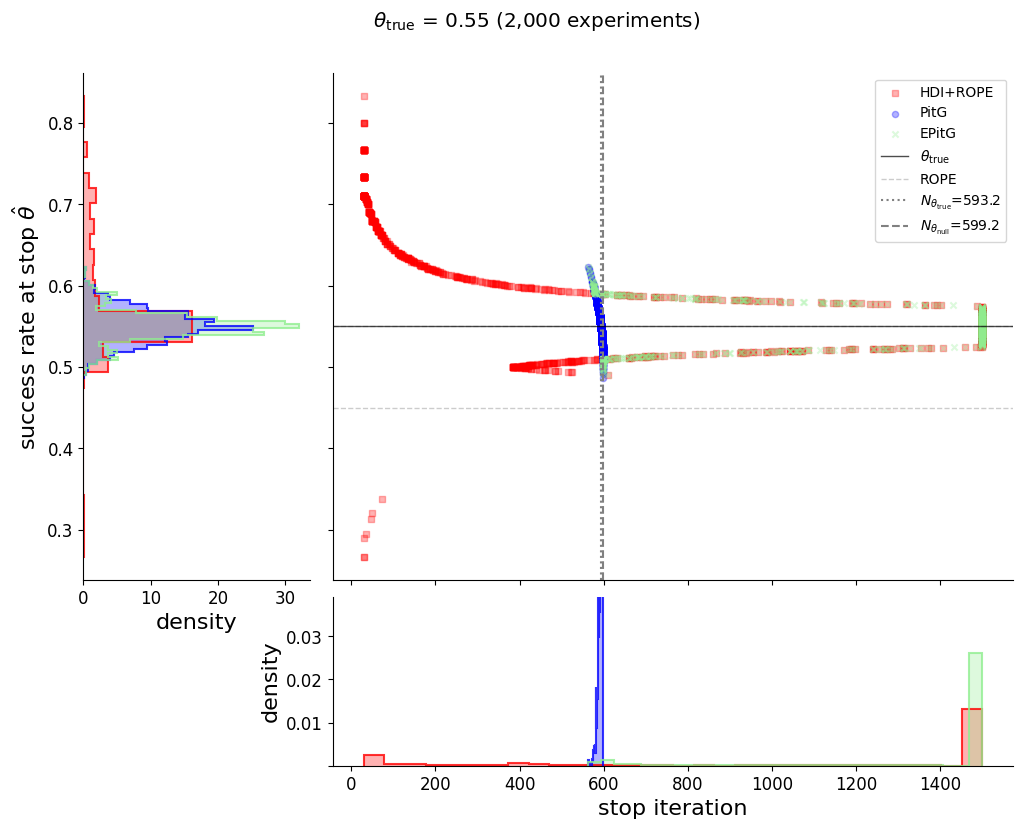

In [177]:
sims_hypo0pt5_results[0.55]['hypothesis'].plot_stop_iter_sample_rates(success_rate=sims_hypo0pt5_results[0.55]['synth'].success_rate, title=None)

viz_epitg separate


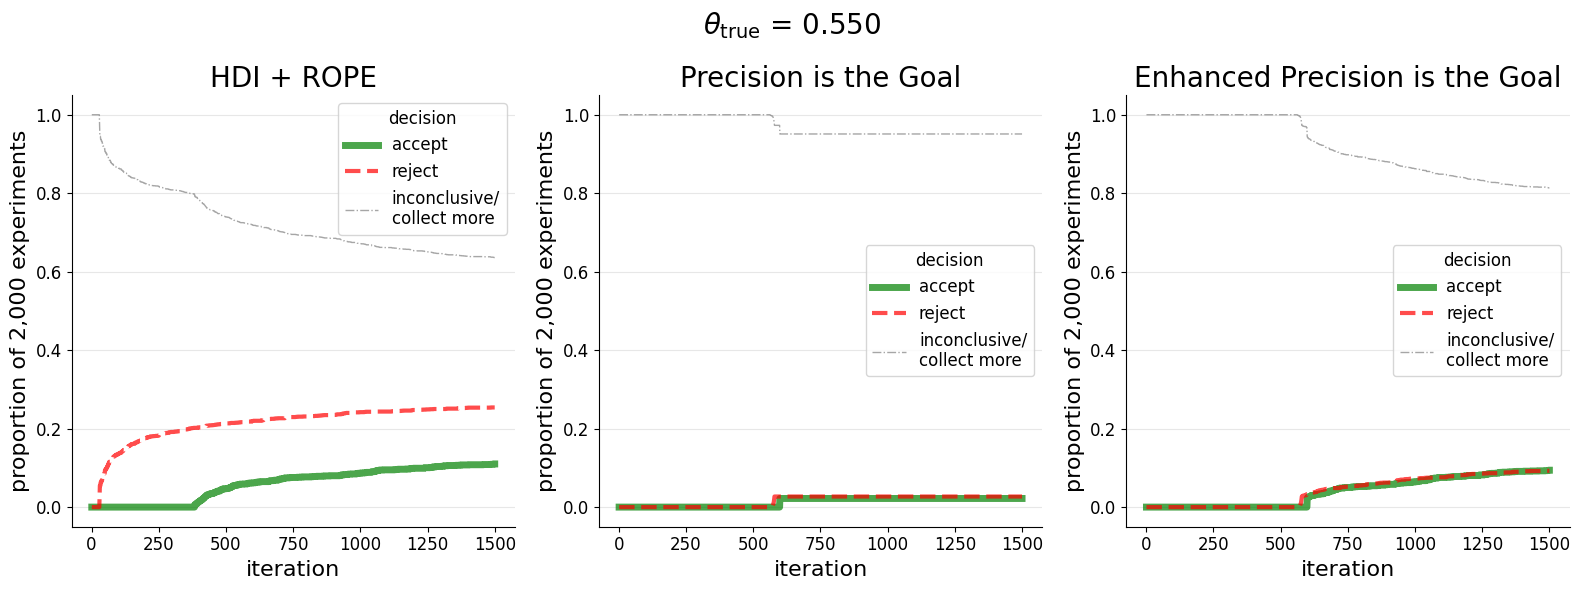

In [176]:
sims_hypo0pt5_results[0.55]['hypothesis'].plot_decision_rates(sims_hypo0pt5_results[0.55]['synth'].success_rate)

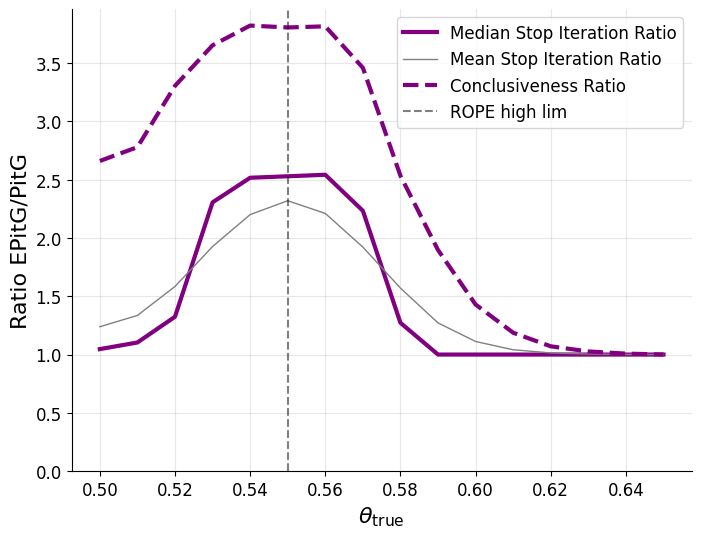

In [196]:
subset_name = "overall"

stop_ratio = algo_stats_df[subset_name]["epitg"]["stop_iter_median"] / algo_stats_df[subset_name]["pitg"]["stop_iter_median"]
stop_ratio_mean = algo_stats_df[subset_name]["epitg"]["stop_iter_mean"] / algo_stats_df[subset_name]["pitg"]["stop_iter_mean"]
conclusive_ratio = algo_stats_df[subset_name]["epitg"]["conclusive_mean"] / algo_stats_df[subset_name]["pitg"]["conclusive_mean"]

plt.plot(stop_ratio, color="purple", linewidth=3, label="Median Stop Iteration Ratio")
plt.plot(stop_ratio_mean, color="gray", linewidth=1, label="Mean Stop Iteration Ratio")
plt.plot(conclusive_ratio, color="purple", linewidth=3, linestyle="--", label="Conclusiveness Ratio")
plt.ylim(0,None)
plt.grid(alpha=0.3)
plt.xlabel(r"$\theta_{\rm true}$")
plt.ylabel("Ratio EPitG/PitG")
plt.axvline(x=0.5 + dsuccess_rate, color="black", linestyle="--", alpha=0.5, label="ROPE high lim")
plt.legend()

# create twin axis for conclusive ratio
# ax1 = plt.gca()

# ax2 = ax1.twinx()
# plt.plot(algo_stats_df[subset_name]["epitg"]["conclusive_mean"], color="blue", linewidth=0.5, linestyle="--")
# plt.ylim(0,None)
# plt.ylabel("EPitG Conclusive Rate", color="blue")
